<div style="text-align: center; margin-bottom: 2em;">
    <h1 style="font-size: 2.5em; margin-bottom: 0.5em; color: #2c3e50;">Earth observation big data sources</h1>
    <div style="font-size: 1.2em; color: #7f8c8d; margin-top: 1em;">
        Gilberto Camara
    </div>
</div>


### Configurations to run the chapter

In [ ]:
# load package "tibble"
library(tibble)
# load packages "sits" and "sitsdata"
library(sits)
library(sitsdata)
library(aws.s3)
library(earthdatalogin)
# set tempdir if it does not exist 
tempdir_r <- "data/th_data_sources"
dir.create(tempdir_r, showWarnings = FALSE, recursive = TRUE)

## ARD Image Collections

Analysis Ready Data (CEOS-ARD) are satellite data that have been processed to meet the [ARD standards](https://ceos.org/ard/) defined by the Committee on Earth Observation Satellites (CEOS). ARD data simplify and accelerate the analysis of Earth observation data by providing consistent and high-quality data that are standardized across different sensors and platforms. ARD images processing includes geometric corrections, radiometric corrections, and sometimes atmospheric corrections. Images are georeferenced, meaning they are accurately aligned with a coordinate system. Optical ARD images include cloud and shadow masking information. These masks indicate which pixels affected by clouds or cloud shadows. For optical sensors, CEOS-ARD images have to be converted to surface reflectance values, which represent the fraction of light that is reflected by the surface. This makes the data more comparable across different times and locations. For SAR images, CEOS-ARD specification require images to undergo Radiometric Terrain Correction (RTC) and are provided in the GammaNought ($\gamma_0$) backscatter values. This value which mitigates the variations from diverse observation geometries and is recommended for most land applications.

ARD images are available from various satellite platforms, including Landsat, Sentinel, and commercial satellites. This provides a wide range of spatial, spectral, and temporal resolutions to suit different applications. They are organised as a collection of  files, where each pixel contains a single value for each spectral band for a given date. These collections are available in cloud services such as Brazil Data Cube, Digital Earth Africa, and Microsoft's Planetary Computer. In general, the timelines of the images of an ARD collection are different. Images still contain cloudy or missing pixels; bands for the images in the collection may have different resolutions. [Figure 1](#fig-ard-datacubes) shows an example of the Landsat ARD image collection. 

<a id="fig-ard-datacubes"></a>
<center>
    <figure>
    <img src="./images/th_data_sources/usgs_ard_tile.png" alt="ARD image collection (source: USGS). fig-align: center" style="width:80%">
    <figcaption align="center">Figure 1: ARD image collection (source: USGS). fig-align: center</figcaption>
    </figure>
</center>

## Cloud platforms providing ARD data

Machine learning and deep learning (ML/DL) classification algorithms require the input data to be consistent. The dimensionality of the data used for training the model has to be the same as that of the data to be classified. There should be no gaps and no missing values. Thus, to use ML/DL algorithms for remote sensing data, ARD image collections should be converted to regular data cubes.

There are a large number of cloud platforms providing open data organized as Analysis-Ready Data, including: Amazon Web Services (AWS), Brazil Data Cube (BDC), Copernicus Data Space Ecosystem (CDSE), Digital Earth Africa (DEAFRICA), Digital Earth Australia (DEAUSTRALIA), Microsoft Planetary Computer (MPC), and Nasa Harmonized Landsat/Sentinel (HLS), 

This chapter describes how to access these collections and transform ARD images into regular data cubes. A data cube is a set of images organized in tiles of a grid system (e.g., MGRS). Each tile contains single-band images in a unique zone of the coordinate system (e.g, tile 20LMR in MGRS grid) covering the period between start_date and end_date. All tiles share the same set of regular temporal intervals and the same spectral bands and indices. All images have the same spatial resolution.

## Tiling systems used by ARD collections

ARD image collections are organized in spatial partitions. Sentinel-2/2A images follow the Military Grid Reference System (MGRS) tiling system, which divides the world into 60 UTM zones of 8 degrees of longitude. Each zone has blocks of 6 degrees of latitude. Blocks are split into tiles of 110 $\times$ 110 km$^2$ with a 10 km overlap. Figure [Figure 2](#fig-mgrs-datacubes) shows the MGRS tiling system for a part of the Northeastern coast of Brazil, contained in UTM zone 24, block M. 

<a id="fig-mgrs-datacubes"></a>
<center>
    <figure>
    <img src="./images/th_data_sources/s2_mgrs_grid.png" alt="MGRS tiling system used by Sentinel-2 images (source: US Army). fig-align: center" style="width:80%">
    <figcaption align="center">Figure 2: MGRS tiling system used by Sentinel-2 images (source: US Army). fig-align: center</figcaption>
    </figure>
</center>

The Landsat-4/5/7/8/9 satellites use the Worldwide Reference System (WRS-2), which breaks the coverage of Landsat satellites into images identified by path and row (see Figure \@ref(fig:wrs)).  The path is the descending orbit of the satellite; the WRS-2 system has 233 paths per orbit, and each path has 119 rows, where each row refers to a latitudinal center line of a frame of imagery. Images in WRS-2 are geometrically corrected to the UTM projection.

<a id="fig-wrs-datacubes"></a>
<center>
    <figure>
    <img src="./images/th_data_sources/landsat_wrs_grid.png" alt="MGRS tiling system used by Sentinel-2 images (source: US Army). fig-align: center" style="width:80%">
    <figcaption align="center">Figure 3: MGRS tiling system used by Sentinel-2 images (source: US Army). fig-align: center</figcaption>
    </figure>
</center>

## Major global or large regional cloud provides

The following ARD image cloud providers provide global or large regional data:

-  Amazon Web Services (AWS): Open data Sentinel-2/2A level 2A collections for the Earth's land surface. 
-  Brazil Data Cube (BDC): Open data collections of Sentinel-2/2A, Landsat-8, CBERS-4/4A, and MOD13Q1 products for Brazil. These collections are organized as regular data cubes. 
- Copernicus Data Space Ecosystem (CDSE): Open data collections of Sentinel-1 RTC and Sentinel-2/2A images. 
- Digital Earth Africa (DEAFRICA): Open data collections of Sentinel-1 RTC, Sentinel-2/2A, Landsat-5/7/8/9 for Africa. Additional products available include ALOS_PALSAR mosaics, DEM_COP_30, NDVI_ANOMALY based on Landsat data, and monthly and daily rainfall data from CHIRPS. 
- Digital Earth Australia (DEAUSTRALIA): Open data ARD collections of Sentinel-2A/2B and Landsat-5/7/8/9 images, yearly geomedian of Landsat 5/7/8 images; yearly fractional land cover from 1986 to 2024. 
- Harmonized Landsat-Sentinel (HLS): HLS, provided by NASA, is an open data collection that processes Landsat 8 and Sentinel-2 imagery to a common standard.
- Microsoft Planetary Computer (MPC): Open data collections of Sentinel-1 GRD, Sentinel-1 RTC, Sentinel-2/2A,  Landsat-4/5/7/8/9 images for the Earth's land areas. Also supported are Copernicus DEM-30 and MOD13Q1, MOD10A1 and MOD09A1 products, and the Harmonized Landsat-Sentinel collections (HLSL30 and HLSS30).


## Accessing ARD image collections in cloud providers

<a href="https://www.kaggle.com/esensing/creating-data-cubes-in-sits" target="_blank"><img src="https://kaggle.com/static/images/open-in-kaggle.svg"/></a>

We now present the use of the `sits` R package to obtain information on ARD image collection from cloud providers, using the [SpatioTemporal Asset Catalogue](https://stacspec.org/en) (STAC) protocol, a specification of geospatial information which many large image collection providers have adopted. A 'spatiotemporal asset' is any file that represents information about the Earth captured in a specific space and time. To access STAC endpoints, `sits` uses the [rstac](http://github.com/brazil-data-cube/rstac) R package.

The function `sits_cube()` supports access to image collections in cloud services; it has the following parameters:

- `source`: Name of the provider. 
- `collection`: A collection available in the provider and supported by `sits`. To find out which collections are supported by `sits`, see `sits_list_collections()`. 
- `platform`: Optional parameter specifying the platform in collections with multiple satellites. 
- `tiles`: Set of tiles of image collection reference system. Either `tiles` or `roi` should be specified. 
-  `roi`: A region of interest. Either: (a) a named vector (`lon_min`, `lon_max`, `lat_min`, `lat_max`) in WGS 84 coordinates; (b) an `sf` object; (c) a path to a shapefile polygon; (d) A named vector (`xmin`, `xmax`, `ymin`, `ymax`) with XY coordinates. All images intersecting the convex hull of the `roi` are selected. 
- `bands`: Optional parameter with the bands to be used. If missing, all bands from the collection are used.
- `orbit`: Optional parameter required only for Sentinel-1 images (default = "descending").
- `start_date`: The initial date for the temporal interval containing the time series of images.
- `end_date`: The final date for the temporal interval containing the time series of images.

The result of `sits_cube()` is a tibble with a description of the selected images required for further processing. It does not contain the actual data, but only pointers to the images.  The attributes of individual image files can be assessed by listing the `file_info` column of the tibble. 

## Amazon Web Services

Amazon Web Services (AWS) holds two kinds of collections: *open-data* and *requester-pays*. Open data collections can be accessed without cost. Requester-pays collections require payment from an AWS account. Currently, `sits` supports collection `SENTINEL-2-L2A` which is open data.  The bands in 10 m resolution are B02, B03, B04, and B08. The  20 m bands are B05, B06, B07, B8A, B11, and B12. Bands B01 and B09 are available at 60 m resolution. A CLOUD band is also available. The example below shows how to access one tile of the open data `SENTINEL-2-L2A` collection.  The `tiles` parameter allows selecting the desired area according to the MGRS reference system. 

  |======================================================================| 100%


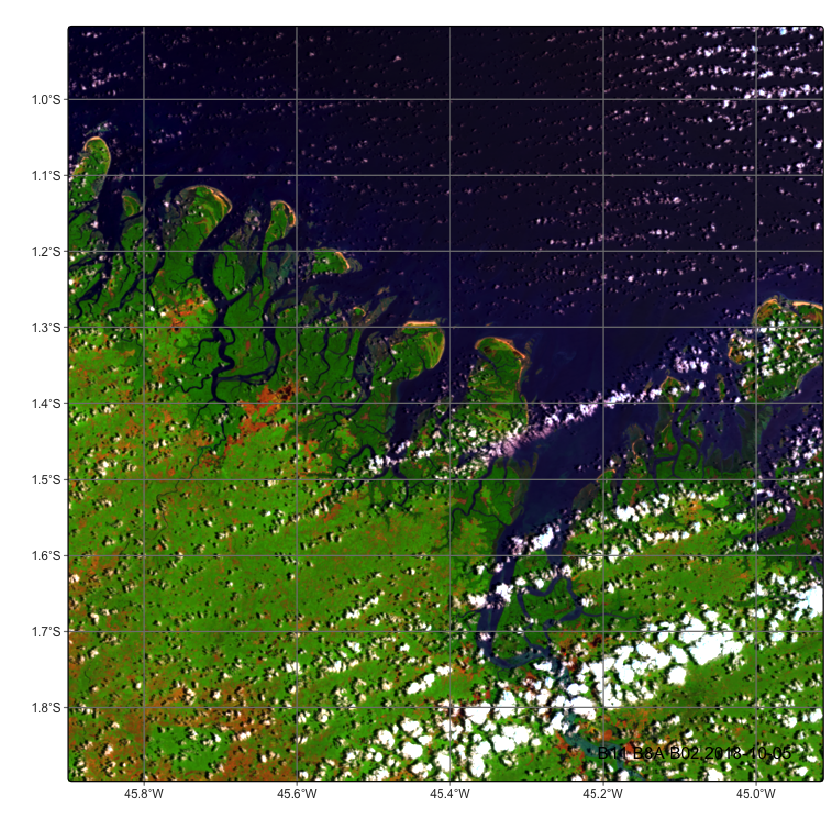

In [3]:
# Create a data cube covering an area in Brazil
s2_23MMU_cube <- sits_cube(
    source = "AWS",
    collection = "SENTINEL-2-L2A",
    tiles = "23MMU",
    bands = c("B02", "B8A", "B11", "CLOUD"),
    start_date = "2018-07-12",
    end_date = "2019-07-28"
)
plot(s2_23MMU_cube, 
     red = "B11", 
     blue = "B02", 
     green = "B8A", 
     date = "2018-10-05"
)

<a id="fig-aws-datacubes"></a>
<center>
    <figure>
    <img src="./images/th_data_sources/aws_s2.png" alt="Sentinel-2 image in an area of the Northeastern coast of Brazil. fig-align: center" style="width:80%">
    <figcaption align="center">Figure 4: Sentinel-2 image in an area of the Northeastern coast of Brazil. fig-align: center</figcaption>
    </figure>
</center>

## Microsoft Planetary Computer

The `sits` package supports access to open data collection from Microsoft's Planetary Computer (MPC), including `SENTINEL-1-GRD`, `SENTINEL-1-RTC`, `SENTINEL-2-L2A`, `LANDSAT-C2-L2`, `COP-DEM-GLO-30` (Copernicus Global DEM at 30 meter resolution) and `MOD13Q1-6.1`(version 6.1 of the MODIS MOD13Q1 product). Access to the non-open data collection  is available for users that have registration in MPC. 

### SENTINEL-2/2A images in MPC

The SENTINEL-2/2A ARD images available in MPC have the same bands and resolutions as those available in AWS (see above). The example below shows how to access the `SENTINEL-2-L2A` collection. 

In [ ]:
# Create a data cube covering an area in the Brazilian Amazon
s2_20LKP_cube_MPC <- sits_cube(
      source = "MPC",
      collection = "SENTINEL-2-L2A",
      tiles = "20LKP",
      bands = c("B02", "B8A", "B11", "CLOUD"),
      start_date = "2019-07-01",
      end_date = "2019-07-28"
)
# Plot a color composite of one date of the cube
plot(s2_20LKP_cube_MPC, red = "B11", blue = "B02", green = "B8A", 
     date = "2019-07-18"
)

<a id="fig-s2mpc-datacubes"></a>
<center>
    <figure>
    <img src="./images/th_data_sources/mpc_s2.png" alt="Sentinel-2 image in an area of the state of Rondonia, Brazil. fig-align: center" style="width:80%">
    <figcaption align="center">Figure 5: Sentinel-2 image in an area of the state of Rondonia, Brazil. fig-align: center</figcaption>
    </figure>
</center>

### LANDSAT-C2-L2 images in MPC

The `LANDSAT-C2-L2` collection provides access to data from Landsat-4/5/7/8/9 satellites. Images from these satellites have been intercalibrated to ensure data consistency. For compatibility between the different Landsat sensors, the band names are BLUE, GREEN, RED,  NIR08,  SWIR16, and SWIR22. All images have 30 m resolution. For this collection,  tile search is not supported; the `roi` parameter should be used. The example below shows how to retrieve data from a region of interest covering the city of Brasilia in Brazil. 

In [ ]:
# Read a ROI that covers part of the Northeastern coast of Brazil
roi <- c(lon_min = -43.5526, lat_min = -2.9644, 
         lon_max = -42.5124, lat_max = -2.1671)
# Select the cube
s2_L8_cube_MPC <- sits_cube(
        source = "MPC",
        collection = "LANDSAT-C2-L2",
        bands = c("BLUE", "RED", "GREEN", "NIR08", "SWIR16", "CLOUD"),
        roi = roi,
        start_date = "2019-06-01",
        end_date = "2019-09-01"
)
# Plot the tile that covers the Lencois Maranhenses
plot(s2_L8_cube_MPC)

<a id="fig-l8mpc-datacubes"></a>
<center>
    <figure>
    <img src="./images/th_data_sources/mpc_l8.png" alt="Landsat-8 image in an area in Northeast Brazil. fig-align: center" style="width:80%">
    <figcaption align="center">Figure 6: Landsat-8 image in an area in Northeast Brazil. fig-align: center</figcaption>
    </figure>
</center>

### SENTINEL-1-GRD images in MPC

Sentinel-1 GRD products consist of focused SAR data that has been detected, multi-looked and projected to ground range using the WGS84 Earth ellipsoid model. GRD images are subject for variations in the radar signal's intensity due to topographic effects, antenna pattern, range spreading loss, and other radiometric distortions. The most common types of distortions include foreshortening, layover and shadowing. 

Foreshortening occurs when the radar signal strikes a steep terrain slope facing the radar, causing the slope to appear compressed in the image. Features like mountains can appear much steeper than they are, and their true heights can be difficult to interpret. Layover happens when the radar signal reaches the top of a tall feature (like a mountain or building) before it reaches the base. As a result, the top of the feature is displaced towards the radar and appears in front of its base. This results in a reversal of the order of features along the radar line-of-sight, making the image interpretation challenging. Shadowing occurs when a radar signal is obstructed by a tall object, casting a shadow on the area behind it that the radar cannot illuminate. The shadowed areas appear dark in SAR images, and no information is available from these regions, similar to optical shadows.
 
Access to Sentinel-1 GRD images can be done either by MGRS tiles (`tiles`) or by region of interest (`roi`). We recommend using the MGRS tiling system for specifying the area of interest, since when these images are regularized, they will be re-projected into MGRS tiles. By default, only images in descending orbit are selected. 

The following example shows how to create a data cube of S1 GRD images over a region in Mato Grosso Brazil that is an area of the Amazon forest that has been deforested. The resulting cube will not follow any specific projection and its coordinates will be stated as EPSG 4326 (latitude/longitude). Its geometry is derived from the SAR slant-range perspective; thus, it will appear included in relation to the Earth's longitude. 

In [ ]:
cube_s1_grd <-  sits_cube(
  source = "MPC",
  collection = "SENTINEL-1-GRD",
  bands = c("VV"),
  orbit = "descending",
  tiles = c("21LUJ","21LVJ"),
  start_date = "2021-08-01",
  end_date = "2021-09-30"
)
plot(cube_s1_grd, band = "VV", palette = "Greys")

<a id="fig-s1grdmpc-datacubes"></a>
<center>
    <figure>
    <img src="./images/th_data_sources/mpc3.png" alt="Sentinel-1 image in an area in Mato Grosso, Brazil. fig-align: center" style="width:80%">
    <figcaption align="center">Figure 7: Sentinel-1 image in an area in Mato Grosso, Brazil. fig-align: center</figcaption>
    </figure>
</center>

As explained earlier in this chapter, in areas with areas with large elevation differences, Sentinel-1 GRD images will have geometric distortions. For this reason, whenever possible, we recommend the use of RTC (radiometrically terrain corrected) images as described in the next session. 


### SENTINEL-1-RTC images in MPC

An RTC SAR image has undergone corrections for both geometric distortions and radiometric distortions caused by the terrain. The purpose of RTC processing is to enhance the interpretability and usability of SAR images for various applications by providing a more accurate representation of the Earth's surface. The radar backscatter values are normalized to account for these variations, ensuring that the image accurately represents the reflectivity of the surface features.

The terrain correction addresses geometric distortions caused by the side-looking geometry of SAR imaging, such as foreshortening, layover, and shadowing. It uses a Digital Elevation Model (DEM) to model the terrain and re-project the SAR image from the slant range (radar line-of-sight) to the ground range (true geographic coordinates). This process aligns the SAR image with the actual topography, providing a more accurate spatial representation.


In [ ]:
cube_s1_rtc <-  sits_cube(
  source = "MPC",
  collection = "SENTINEL-1-RTC",
  bands = c("VV", "VH"),
  orbit = "descending",
  tiles = "18NZM",
  start_date = "2021-08-01",
  end_date = "2021-09-30"
)
plot(cube_s1_rtc, band = "VV", palette = "Greys")

<a id="fig-s1rtcmpc-datacubes"></a>
<center>
    <figure>
    <img src="./images/th_data_sources/mpcrtcol.png" alt="Sentinel-1-RTC image of an area in Colombia. fig-align: center" style="width:80%">
    <figcaption align="center">Figure 8: Sentinel-1-RTC image of an area in Colombia. fig-align: center</figcaption>
    </figure>
</center>

The above image is from the central region of Colombia, a country with large variations in altitude due to the Andes mountains. Users are invited to compare this images with the one from the `SENTINEL-1-GRD` collection and see the significant geometrical distortions of the GRD image compared with the RTC one.

### Copernicus DEM 30 meter images in MPC

The Copernicus digital elevation model 30-meter global dataset (COP-DEM-GLO-30) is a high-resolution topographic data product provided by the European Space Agency (ESA) under the Copernicus Program. The vertical accuracy of the Copernicus DEM 30-meter dataset is typically within a few meters, but this can vary depending on the region and the original data sources. The primary data source for the Copernicus DEM is data from the TanDEM-X mission, designed by the German Aerospace Center (DLR). TanDEM-X provides high-resolution radar data through interferometric synthetic aperture radar (InSAR) techniques.

The Copernicus DEM 30 meter is organized in a 1$^\circ$ by 1$^\circ$ grid. In `sits`, access to COP-DEM-GLO-30 images can be done either by MGRS tiles (`tiles`) or by region of interest (`roi`). In both case, the cube is retrieved based on the parts of the grid that intersect the region of interest or the chosen tiles.

In [ ]:
cube_dem_30 <-  sits_cube(
  source = "MPC",
  collection = "COP-DEM-GLO-30",
  tiles = "20LMR",
  band = "ELEVATION"
)
plot(cube_dem_30, band = "ELEVATION", palette = "RdYlGn", rev = TRUE)

<a id="fig-demmpc-datacubes"></a>
<center>
    <figure>
    <img src="./images/th_data_sources/mpc4.png" alt="Copernicus 30-meter DEM of an area in Brazil. fig-align: center" style="width:80%">
    <figcaption align="center">Figure 9: Copernicus 30-meter DEM of an area in Brazil. fig-align: center</figcaption>
    </figure>
</center>

## Copernicus Data Space Ecosystem (CDSE)

The Copernicus Data Space Ecosystem (CDSE) is a cloud service designed to support access to Earth observation data from the Copernicus Sentinel missions and other sources. It is designed and maintained by the European Space Agency (ESA) with support from the European Commission. 

Configuring user access to CDSE involves several steps to ensure proper registration, access to data, and utilization of the platform's tools and services. Visit the Copernicus Data Space Ecosystem [registration page](https://dataspace.copernicus.eu). Complete the registration form with your details, including name, email address, organization, and sector. Confirm your email address through the verification link sent to your inbox.

After registration, you will need to obtain access credentials to the S3 service implemented by CDSE, which can be obtained using the [CSDE S3 credentials site](https://eodata-s3keysmanager.dataspace.copernicus.eu/panel/s3-credentials). The site will request you to add a new credential. You will receive two keys: an an S3 access key and a secret access key. Take note of both and include the following lines in your `.Rprofile`.

In [ ]:
Sys.setenv(
    AWS_ACCESS_KEY_ID = "your access key",
    AWS_SECRET_ACCESS_KEY = "your secret access key",
	AWS_S3_ENDPOINT = "eodata.dataspace.copernicus.eu",
	AWS_VIRTUAL_HOSTING = "FALSE"
)

After including these lines in your .Rprofile, restart `R` for the changes to take effect. By following these steps, users will have access to the Copernicus Data Space Ecosystem. 

### SENTINEL-2/2A images in CDSE

CDSE hosts a global collection of Sentinel-2 Level-2A images, which are processed according to the [CEOS Analysis-Ready Data](https://ceos.org/ard/) specifications. One example is provided below, where we present a Sentinel-2 image of the Lena river delta in Siberia in summertime.

In [ ]:
# obtain a collection of images of a tile covering part of Lena delta
lena_cube <- sits_cube(
    source = "CDSE",
    collection = "SENTINEL-2-L2A",
    bands = c("B02", "B04", "B8A", "B11", "B12"),
    start_date = "2023-05-01",
    end_date = "2023-09-01",
    tiles = c("52XDF")
)
# plot an image from summertime
plot(lena_cube, date = "2023-07-06", red = "B12", green = "B8A", blue = "B04")

<a id="fig-lena-datacubes"></a>
<center>
    <figure>
    <img src="./images/th_data_sources/s2_lena_delta.png" alt="Sentinel-2 image of the Lena river delta in summertime. fig-align: center" style="width:80%">
    <figcaption align="center">Figure 10: Sentinel-2 image of the Lena river delta in summertime. fig-align: center</figcaption>
    </figure>
</center>

### SENTINEL-1-RTC images in CDSE

An important product under development at CDSE are the radiometric terrain corrected (RTC) Sentinel-1 images. in CDSE, this product is referred to as normalized terrain backscater (NRB). The S1-NRB product contains radiometrically terrain corrected (RTC) gamma nought backscatter (γ0) processed from Single Look Complex (SLC) Level-1A data. Each acquired polarization is stored in an individual binary image file. 

All images are projected and gridded into the United States Military Grid Reference System (US-MGRS). The use of the US-MGRS tile grid ensures a very high level of interoperability with Sentinel-2 Level-2A ARD products making it easy to also set-up complex analysis systems that exploit both SAR and optical data. While speckle is inherent in SAR acquisitions, speckle filtering is not applied to the S1-NRB product in order to preserve spatial resolution.  Some applications (or processing methods) may require spatial or temporal filtering for stationary backscatter estimates. 

For more details, please refer to the [S1-NRB product website](https://sentinels.copernicus.eu/web/sentinel/sentinel-1-ard-normalised-radar-backscatter-nrb-product). Global coverage is expected to grow as ESA expands the S1-RTC archive. The following example shows an S1-RTC image for the Rift valley in Ethiopia.

In [ ]:
# retrieve a S1-RTC cube and plot
s1_cube <- sits_cube(
    source = "CDSE-OS",
    collection = "SENTINEL-1-RTC",
    bands = c("VV", "VH"),
    orbit = "descending",
    start_date = "2023-01-01",
    end_date = "2023-12-31",
    tiles = c("37NCH")
)
plot(s1_cube, band = "VV", date = c("2023-03-03"), palette = "Greys")

<a id="fig-rtccdse-datacubes"></a>
<center>
    <figure>
    <img src="./images/th_data_sources/s1_rtc_cdse.png" alt="Sentinel-1-RTC image of the Rift Valley in Ethiopia. fig-align: center" style="width:80%">
    <figcaption align="center">Figure 11: Sentinel-1-RTC image of the Rift Valley in Ethiopia. fig-align: center</figcaption>
    </figure>
</center>

## Digital Earth Africa

Digital Earth Africa (DEAFRICA) is a cloud service that provides open-access Earth observation data for the African continent. The ARD image collections in `sits` are:

- Sentinel-2 level 2A (`SENTINEL-2-L2A`), organised as MGRS tiles.
- Sentinel-1 radiometrically terrain corrected (`SENTINEL-1-RTC`)
- Landsat-5 (`LS5-SR`), Landsat-7 (`LS7-SR`), Landsat-8 (`LS8-SR`) and Landat-9 (`LS9-SR`). All Landsat collections are ARD data and are organized as WRS-2 tiles.
- SAR L-band images produced by PALSAR sensor onboard the Japanese ALOS satellite(`ALOS-PALSAR-MOSAIC`). Data is organized in a 5$^\circ$ by 5$^\circ$ grid with a spatial resolution of 25 meters. Images are available annually from 2007 to 2010 (ALOS/PALSAR) and from 2015 to 2022 (ALOS-2/PALSAR-2).
- Estimates of vegetation condition using NDVI anomalies (`NDVI-ANOMALY`) compared with the long-term baseline condition. The available measurements are "NDVI_MEAN" (mean NDVI for a month) and "NDVI-STD-ANOMALY" (standardised NDVI anomaly for a month).
- Rainfall information provided by Climate Hazards Group InfraRed Precipitation with Station data (CHIRPS) from University of California in Santa Barbara. There are monthly (`RAINFALL-CHIRPS-MONTHLY`) and daily (`RAINFALL-CHIRPS-DAILY`) products over Africa.
- Digital elevation model provided by the EC Copernicus program (`COP-DEM-30`) in 30 meter resolution organized in a 1$^\circ$ by 1$^\circ$ grid.
- Annual geomedian images for Landsat 8 and Landsat 9 (`GM-LS8-LS9-ANNUAL` (LANDSAT/OLI)`) in grid system WRS-2.
- Annual geomedian images for Sentinel-2 (`GM-S2-ANNUAL`) in MGRS grid.
- Rolling three-month geomedian images for Sentinel-2 (`GM-S2-ROLLING`) in MGRS grid.
- Semestral geomedian images for Sentinel-2 (`GM-S2-SEMIANNUAL`) in MGRS grid.

Access to DEAFRICA Sentinel-2 images can be done wither using `tiles` or `roi` parameter. In this example, the requested `roi` produces a cube that contains one MGRS tiles (“35LPH”) covering an area of Madagascar that includes the Betsiboka Estuary.

In [ ]:
dea_s2_cube <- sits_cube(
    source = "DEAFRICA",
    collection = "SENTINEL-2-L2A",
    roi = c(
    lon_min = 46.1, lat_min = -15.6,
    lon_max = 46.6, lat_max = -16.1
  ),
    bands = c("B02", "B04", "B08"),
    start_date = "2019-04-01",
    end_date = "2019-05-30"
)
plot(dea_s2_cube, red = "B04", blue = "B02", green = "B08")

<a id="fig-s2deaf-datacubes"></a>
<center>
    <figure>
    <img src="./images/th_data_sources/deafrica_s2.png" alt="Sentinel-2 image in an area over Madagascar. fig-align: center" style="width:80%">
    <figcaption align="center">Figure 12: Sentinel-2 image in an area over Madagascar. fig-align: center</figcaption>
    </figure>
</center>

The next example retrieves a set of ARD Landsat-9 data, covering the Serengeti plain in Tanzania. 

In [ ]:
dea_l9_cube <- sits_cube(
    source = "DEAFRICA",
    collection = "LS9-SR",
    roi = c(
        lon_min = 33.0, lat_min = -3.60, 
        lon_max = 33.6, lat_max = -3.00
    ),
    bands = c("B04", "B05", "B06"),
    start_date = "2023-05-01",
    end_date = "2023-08-30"
)
plot(dea_l9_cube, date = "2023-06-26", 
     red = "B06", green = "B05", blue = "B04")

<a id="fig-l9deaf-datacubes"></a>
<center>
    <figure>
    <img src="./images/th_data_sources/landsat9_serengeti.png" alt="Landsat-9 image in an area over the Serengeti in Tanzania. fig-align: center" style="width:80%">
    <figcaption align="center">Figure 13: Landsat-9 image in an area over the Serengeti in Tanzania. fig-align: center</figcaption>
    </figure>
</center>

The following example shows how to retrieve a subset of the ALOS-PALSAR mosaic for year 2020, for an area near the border between Congo and Rwanda. 

In [ ]:
dea_alos_cube = sits_cube(
    source = "DEAFRICA",
    collection = "ALOS-PALSAR-MOSAIC",
    roi = c(
        lon_min = 28.69, lat_min = -2.35, 
        lon_max = 29.35, lat_max = -1.56
    ),
    bands = c("HH", "HV"),
    start_date = "2020-01-01",
    end_date = "2020-12-31"
)
plot(dea_alos_cube, band = "HH")

<a id="fig-sarhhdeaf-datacubes"></a>
<center>
    <figure>
    <img src="./images/th_data_sources/alos_palsar_hh_lake_kivu.png" alt="ALOS-PALSAR mosaic in the Congo forest area. fig-align: center" style="width:80%">
    <figcaption align="center">Figure 14: ALOS-PALSAR mosaic in the Congo forest area. fig-align: center</figcaption>
    </figure>
</center>

## Harmonized Landsat-Sentinel

Harmonized Landsat Sentinel (HLS) is a NASA initiative that processes and harmonizes Landsat 8 and Sentinel-2 imagery to a common standard, including atmospheric correction, alignment, resampling, and corrections for BRDF (bidirectional reflectance distribution function). The purpose of the HLS project is to create a unified and consistent dataset that integrates the advantages of both systems, making it easier to work with the data.

The NASA Harmonized Landsat and Sentinel (HLS) service provides two image collections:

- Landsat 8 OLI Surface Reflectance HLS (HLSL30) – The HLSL30 product includes atmospherically corrected surface reflectance from the Landsat 8 OLI sensors at 30 m resolution. The dataset includes 11 spectral bands.

- Sentinel-2 MultiSpectral Instrument Surface Reflectance HLS (HLSS30) – The HLSS30 product includes atmospherically corrected surface reflectance from the Sentinel-2 MSI sensors at 30 m resolution. The dataset includes 12 spectral bands.

The HLS tiling system is identical as the one used for Sentinel-2 (MGRS). The tiles dimension is 109.8 km and there is an overlap of 4,900 m on each side.

To access NASA HLS, users need to registed at [NASA EarthData](https://urs.earthdata.nasa.gov/), and save their login and password in a ~/.netrc plain text file in Unix (or %HOME%\_netrc in Windows). The file must contain the following fields:

```{sh}
#| eval: false
machine urs.earthdata.nasa.gov
login <username>
password <password>
```

We recommend using the earthdatalogin package to create a `.netrc` file with the `earthdatalogin::edl_netrc`. This function creates a properly configured .netrc file in the user's home directory and an environment variable GDAL_HTTP_NETRC_FILE, as shown in the example. As an alternative, we recommend using the HLS collections which are available in Microsoft Planetary Computer, which are a copy of the NASA collections and are faster to access. 

In [ ]:
library(earthdatalogin)

earthdatalogin::edl_netrc( 
username = "<your user name>", 
password = "<your password>" 
) 

Access to images in NASA HLS is done by region of interest or by tiles. The following example shows an HLS Sentinel-2 image over the Brazilian coast. 

In [ ]:
# define a region of interest
roi <- c(lon_min = -45.6422, lat_min = -24.0335,
         lon_max = -45.0840, lat_max = -23.6178)

# create a cube from the HLSS30 collection
hls_cube_s2 <- sits_cube(
  source = "HLS",
  collection = "HLSS30",
  roi = roi,
  bands = c("BLUE", "GREEN", "RED", "CLOUD"),
  start_date = as.Date("2020-06-01"),
  end_date = as.Date("2020-09-01"),
  progress = FALSE
)
# plot the cube
plot(hls_cube_s2, red = "RED", green = "GREEN", blue = "BLUE", date = "2020-07-20")

<a id="fig-s2hls-datacubes"></a>
<center>
    <figure>
    <img src="./images/th_data_sources/hls_ilhabela_s2.png" alt="Sentinel-2 image from NASA HLSS30 collection showing the island of Ilhabela in the coast of Brazil. fig-align: center" style="width:80%">
    <figcaption align="center">Figure 15: Sentinel-2 image from NASA HLSS30 collection showing the island of Ilhabela in the coast of Brazil. fig-align: center</figcaption>
    </figure>
</center>

## EO products from TERRASCOPE

Terrascope is online platform for accessing open-source satellite images. This service, operated by VITO, offers a range of Earth observation data and processing services that are accessible free of charge. Currently, `sits` supports the World Cover 2021 maps, produced by VITO with support form the European Commission and ESA. The following code shows how to access the World Cover 2021 convering tile "22LBL". The first step is to use `sits_mgrs_to_roi()` to get the region of interest expressed as a bounding box; this box is then entered as the `roi` parameter in the `sits_cube()` function. Since the World Cover data is available as a 3$^\circ$ by 3$^\circ$ grid, it is necessary to use `sits_cube_copy()` to extract the exact MGRS tile.

In [ ]:
# get roi for an MGRS tile
bbox_22LBL <- sits_mgrs_to_roi("22LBL")
# retrieve the world cover map for the chosen roi
world_cover_2021 <- sits_cube(
  source = "TERRASCOPE",
  collection = "WORLD-COVER-2021",
  roi = bbox_22LBL
)
# cut the 3 x 3 degree grid to match the MGRS tile 22LBL
world_cover_2021_20LBL <- sits_cube_copy(
  cube = world_cover_2021,
  roi = bbox_22LBL,
  multicores = 6,
  output_dir = tempdir_r
)
# plot the resulting map
plot(world_cover_2021_20LBL)

<a id="fig-wc-datacubes"></a>
<center>
    <figure>
    <img src="./images/th_data_sources/world_cover_2021.png" alt="World Cover 2021 map covering MGRS tile 22LBL. fig-align: center" style="width:80%">
    <figcaption align="center">Figure 16: World Cover 2021 map covering MGRS tile 22LBL. fig-align: center</figcaption>
    </figure>
</center>